# Library for project

Install Library:

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

# T·ªëi ∆∞u ho√° h√†m bƒÉm ƒë·ªÉ gi·∫£m va ch·∫°m trong ·ª©ng d·ª•ng blockchain


# Load dataset

Mount and clean data from dataset

Mount to drive

In [76]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/dataset/
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/dataset
algorithm  hash_algorithm_dataset.csv  hash_algorithm_model.h5	hash_algorithm_test_dataset.csv


# X√¢y d·ª±ng Model ANN

In [74]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


file_path = "/content/drive/MyDrive/dataset/hash_algorithm_dataset.csv"

# ƒê·ªçc dataset
df = pd.read_csv(file_path)

# M√£ h√≥a c·ªôt "Data Type" th√†nh s·ªë
label_encoder = LabelEncoder()
df["Data Type"] = label_encoder.fit_transform(df["Data Type"])

# Chuy·ªÉn ƒë·ªïi c·ªôt "Byte Distribution" t·ª´ chu·ªói th√†nh m·∫£ng s·ªë
df["Byte Distribution"] = df["Byte Distribution"].apply(eval)
byte_distribution_cols = pd.DataFrame(df["Byte Distribution"].tolist())
df = pd.concat([df, byte_distribution_cols], axis=1).drop(columns=["Byte Distribution"])

# M√£ h√≥a c·ªôt "Optimal Hash Algorithm" th√†nh s·ªë
hash_algorithms = ["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]
df["Optimal Hash Algorithm"] = df["Optimal Hash Algorithm"].apply(lambda x: hash_algorithms.index(x))

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
X = df.drop(columns=["Optimal Hash Algorithm"])
y = df["Optimal Hash Algorithm"]

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X√¢y d·ª±ng m√¥ h√¨nh h·ªçc s√¢u
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')  # 4 thu·∫≠t to√°n bƒÉm
])

# Compile m√¥ h√¨nh
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Hu·∫•n luy·ªán m√¥ h√¨nh
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ƒê√°nh gi√° m√¥ h√¨nh
loss, accuracy = model.evaluate(X_test, y_test)
print(f"‚úÖ ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh: {accuracy * 100:.2f}%")

# L∆∞u m√¥ h√¨nh
model.save("hash_algorithm_model.h5")
print("‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh 'hash_algorithm_model.h5'")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - accuracy: 0.8693 - loss: 0.3274 - val_accuracy: 0.9709 - val_loss: 0.0648
Epoch 2/50
2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.9787 - loss: 0.0521 - val_accuracy: 0.9827 - val_loss: 0.0404
Epoch 3/50
2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.9832 - loss: 0.0392 - val_accuracy: 0.9847 - val_loss: 0.0349
Epoch 4/50
2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.9858 - loss: 0.0339 - val_accuracy: 0.9854 - val_loss: 0.0337
Epoch 5/50
2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 3ms/step - accuracy: 0.9870 - loss: 0.0296 - val_accuracy: 0.9862 - val_loss: 0.0304
Epoch 6/50
2500/2500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 3ms/step - accuracy: 0.9885 - loss: 0.0279 - val_accuracy: 0.9856 - val_los

‚úÖ ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh: 99.28%
‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh 'hash_algorithm_model.h5'


# D·ª± ƒëo√°n h√†m bƒÉm t·ªëi ∆∞u

In [60]:
import numpy as np

# Load m√¥ h√¨nh ƒë√£ l∆∞u
model = keras.models.load_model("/content/drive/MyDrive/dataset/hash_algorithm_model.h5")

# D·ªØ li·ªáu ƒë·∫ßu v√†o m·ªõi
new_data = np.array([[512, 4.5, 0.2, 0.75, 0.0001] + [0.1] * 10])

# Chu·∫©n h√≥a d·ªØ li·ªáu
new_data = scaler.transform(new_data)

# D·ª± ƒëo√°n thu·∫≠t to√°n bƒÉm t·ªët nh·∫•t
predicted = model.predict(new_data)
hash_algorithm = hash_algorithms[np.argmax(predicted)]

print("üîπ Thu·∫≠t to√°n bƒÉm ƒë∆∞·ª£c g·ª£i √Ω:", hash_algorithm)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 261ms/step
üîπ Thu·∫≠t to√°n bƒÉm ƒë∆∞·ª£c g·ª£i √Ω: Keccak-256


Th√¥ng s·ªë c·ªßa m√¥ h√¨nh.

In [71]:
import tensorflow as tf

# ƒê·ªçc file CSV
df_test = pd.read_csv("hash_algorithm_test_dataset.csv")

# Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
model_path = "/content/drive/MyDrive/dataset/hash_algorithm_model.h5"
model = tf.keras.models.load_model(model_path)

# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa c·ªôt "Byte Distribution"
print(df_test["Byte Distribution"].dtype)  # N·∫øu l√† 'object', c√≥ th·ªÉ ch·ª©a string

print(df_test["Data Type"])

# Chu·∫©n b·ªã d·ªØ li·ªáu ƒë·∫ßu v√†o
X_test = df_test.drop(columns=["Optimal Hash Algorithm"])

print(type(X_test))  # Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu t·ªïng th·ªÉ
print(isinstance(X_test, np.ndarray))  # Xem c√≥ ph·∫£i m·∫£ng NumPy kh√¥ng
print(isinstance(X_test, list))  # Xem c√≥ ph·∫£i danh s√°ch kh√¥ng
print(X_test[:5])  # In 5 d√≤ng ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra n·ªôi dung

model.summary()

print("X_test shape:", X_test.shape)



object
0       Random Bytes
1      Blockchain TX
2               JSON
3              Image
4               Text
           ...      
995             JSON
996            Image
997             Text
998            Image
999     Random Bytes
Name: Data Type, Length: 1000, dtype: object
<class 'pandas.core.frame.DataFrame'>
False
False
       Data Type  Data Size (Bytes)   Entropy  \
0   Random Bytes               2048  7.912037   
1  Blockchain TX               8192  7.977875   
2           JSON                512  4.356312   
3          Image               4096  7.958004   
4           Text               4096  3.998965   

                                   Byte Distribution  Complexity Score  
0  [0.005859375, 0.00537109375, 0.00390625, 0.003...          1.000000  
1  [0.0030517578125, 0.0032958984375, 0.003784179...          1.000000  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          0.272269  
3  [0.005126953125, 0.003662109375, 0.00366210937...          1.000000  
4  [0.0

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           1,024 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ           4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 4)                   ‚îÇ             260 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 5,446 (21.28 KB)

 Trainable params: 5,444 (21.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

X_test shape: (1000, 5)


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step
üìä B√°o c√°o ƒë√°nh gi√° m√¥ h√¨nh:
              precision    recall  f1-score   support

    SHA3-512       0.96      0.98      0.97        48
      BLAKE3       0.80      1.00      0.89         4
     SHA-256       1.00      0.83      0.91        24
  Keccak-256       0.88      0.96      0.92        24

    accuracy                           0.94       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.94      0.94       100



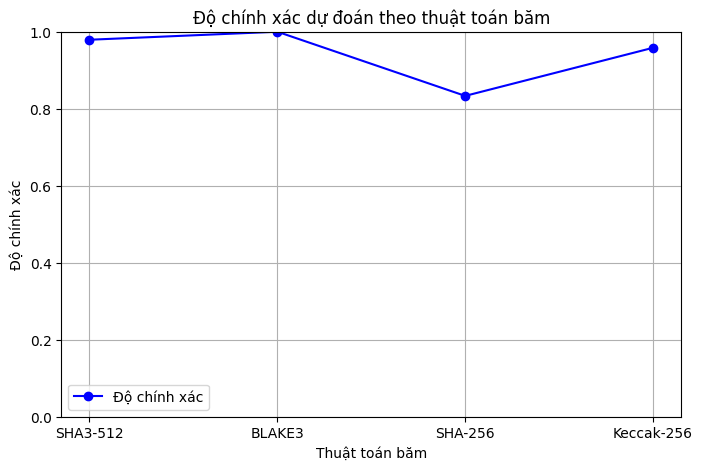

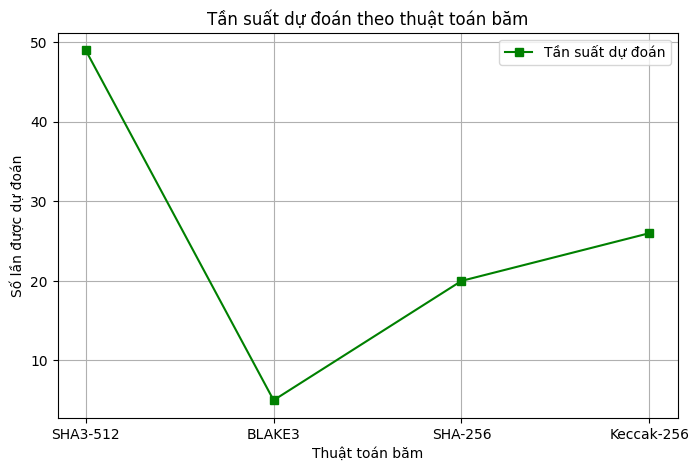

In [83]:
# Test model
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import classification_report, confusion_matrix

# Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
model_path = "/content/drive/MyDrive/dataset/hash_algorithm_model.h5"
model = tf.keras.models.load_model(model_path)

# Load t·∫≠p ki·ªÉm tra
test_data_path = "/content/drive/MyDrive/dataset/hash_algorithm_test_dataset.csv"
df_test = pd.read_csv(test_data_path)

df_test["Byte Distribution"] = df_test["Byte Distribution"].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# M√£ h√≥a c·ªôt "Optimal Hash Algorithm" th√†nh s·ªë
hash_algorithms = ["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]
df_test["Optimal Hash Algorithm"] = df_test["Optimal Hash Algorithm"].apply(lambda x: hash_algorithms.index(x))

# M√£ h√≥a c·ªôt "Datatype" th√†nh s·ªë
data_type = ["Random Bytes", "Blockchain TX", "JSON", "Image", "Text"]
df_test["Data Type"] = df_test["Data Type"].apply(lambda x: data_type.index(x) if x in data_type else -1)


# Chu·∫©n b·ªã d·ªØ li·ªáu ƒë·∫ßu v√†o
X_test = df_test.drop(columns=["Optimal Hash Algorithm"])
y_test = df_test["Optimal Hash Algorithm"]

X_test["Byte Distribution"] = X_test["Byte Distribution"].apply(lambda x: np.array(x) if isinstance(x, list) else np.zeros(256))

byte_distribution_expanded = pd.DataFrame(X_test["Byte Distribution"].to_list(), index=X_test.index)
X_test = X_test.drop(columns=["Byte Distribution"]).join(byte_distribution_expanded)

X_test.columns = X_test.columns.astype(str)

# Chu·∫©n h√≥a d·ªØ li·ªáu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# In b√°o c√°o hi·ªáu su·∫•t
print("üìä B√°o c√°o ƒë√°nh gi√° m√¥ h√¨nh:")
print(classification_report(y_test, y_pred, target_names=["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]))

# Bi·ªÉu ƒë·ªì "ƒê·ªô ch√≠nh x√°c d·ª± ƒëo√°n theo thu·∫≠t to√°n bƒÉm"
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# T√≠nh s·ªë l∆∞·ª£ng m·∫´u ƒë√∫ng tr√™n t·ªïng s·ªë m·∫´u c·ªßa m·ªói thu·∫≠t to√°n
accuracy_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
plt.figure(figsize=(8, 5))
plt.plot(hash_algorithms, accuracy_per_class, marker='o', linestyle='-', color='b', label="ƒê·ªô ch√≠nh x√°c")

# ƒê·ªãnh d·∫°ng bi·ªÉu ƒë·ªì
plt.xlabel("Thu·∫≠t to√°n bƒÉm")
plt.ylabel("ƒê·ªô ch√≠nh x√°c")
plt.title("ƒê·ªô ch√≠nh x√°c d·ª± ƒëo√°n theo thu·∫≠t to√°n bƒÉm")
plt.ylim(0, 1)  # Gi√° tr·ªã trong kho·∫£ng 0-1
plt.grid(True)
plt.legend()
plt.show()

# Bi·ªÉu ƒë·ªì "T·∫ßn su·∫•t d·ª± ƒëo√°n theo thu·∫≠t to√°n bƒÉm"
import collections

# ƒê·∫øm s·ªë l∆∞·ª£ng d·ª± ƒëo√°n m·ªói thu·∫≠t to√°n
pred_counts = collections.Counter(y_pred)

# Chuy·ªÉn ƒë·ªïi th√†nh danh s√°ch theo th·ª© t·ª± thu·∫≠t to√°n bƒÉm
pred_frequencies = [pred_counts[i] for i in range(len(hash_algorithms))]

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
plt.figure(figsize=(8, 5))
plt.plot(hash_algorithms, pred_frequencies, marker='s', linestyle='-', color='g', label="T·∫ßn su·∫•t d·ª± ƒëo√°n")

# ƒê·ªãnh d·∫°ng bi·ªÉu ƒë·ªì
plt.xlabel("Thu·∫≠t to√°n bƒÉm")
plt.ylabel("S·ªë l·∫ßn ƒë∆∞·ª£c d·ª± ƒëo√°n")
plt.title("T·∫ßn su·∫•t d·ª± ƒëo√°n theo thu·∫≠t to√°n bƒÉm")
plt.grid(True)
plt.legend()
plt.show()
